# Case Study 3 : Textual analysis of movie reviews

** Due Date: November 16, 2017, BEFORE the beginning of class at 6:00pm **

NOTE: There are always last minute issues submitting the case studies. DO NOT WAIT UNTIL THE LAST MINUTE!

*------------

<img src="http://www.conversational-technologies.com/nldemos/nlWordle.GIF">

**TEAM Members:** Please EDIT this cell and add the names of all the team members in your team

- Yan Wu
- Shiyang Xia
- Yuhao Zheng
- Zijun Xu
- Han Bao

**Desired outcome of the case study.**
* In this case study we will look at movie reviews from the v2.0 polarity dataset comes from
the http://www.cs.cornell.edu/people/pabo/movie-review-data.
    * It contains written reviews of movies divided into positive and negative reviews.
* As in Case Study 2 idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* This case study will be based upon the scikit-learn Python library
* We will build upon the turtorial "Working With Text Data" which can be found at http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

**Case study assumptions:**
* You have access to a python installation

**Required Python libraries:**
* Numpy (www.numpy.org) (should already be installed from Case Study 2)
* Matplotlib (matplotlib.org) (should already be installed from Case Study 2)
* Scikit-learn (scikit-learn.org) (avaiable from Anaconda)
* You are also welcome to use the Python Natural Language Processing Toolkit (www.nltk.org) (though it is not required).

** NOTE **
* Please don't forget to save the notebook frequently when working in IPython Notebook, otherwise the changes you made can be lost.

*----------------------

## Problem 1 (20 points): Complete Exercise 2: Sentiment Analysis on movie reviews from http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

* Assuming that you have downloaded the scikit-learn source code (depending on your distribution, you may need to download this directly from Gitub at https://github.com/scikit-learn/scikit-learn):
    * The data cane be downloaded using doc/tutorial/text_analytics/data/movie_reviews/fetch_data.py
    * A skeleton for the solution can be found in doc/tutorial/text_analytics/skeletons/exercise_02_sentiment.py
    * A completed solution can be found in doc/tutorial/text_analytics/solutions/exercise_02_sentiment.py
* **It is ok to use the solution provided in the scikit-learn distribution as a starting place for your work.**

### Modify the solution to Exercise 2 so that it can run in this iPython notebook
* This will likely involved moving around data files and/or small modifications to the script.

In [7]:
"""Script to download the movie review dataset"""

import os
import tarfile
from contextlib import closing
try:
    from urllib import urlopen
except ImportError:
    from urllib.request import urlopen


URL = ("http://www.cs.cornell.edu/people/pabo/"
       "movie-review-data/review_polarity.tar.gz")

ARCHIVE_NAME = URL.rsplit('/', 1)[1]
DATA_FOLDER = "txt_sentoken"


if not os.path.exists(DATA_FOLDER):

    if not os.path.exists(ARCHIVE_NAME):
        print("Downloading dataset from %s (3 MB)" % URL)
        opener = urlopen(URL)
        with open(ARCHIVE_NAME, 'wb') as archive:
            archive.write(opener.read())

    print("Decompressing %s" % ARCHIVE_NAME)
    with closing(tarfile.open(ARCHIVE_NAME, "r:gz")) as archive:
        archive.extractall(path='.')
    os.remove(ARCHIVE_NAME)
print('Download Completed')

Decompressing review_polarity.tar.gz
Download Completed


#### Exercise 2: Sentiment Analysis on movie reviews
- Write a text classification pipeline to classify movie reviews as either positive or negative.
- Find a good set of parameters using grid search.
- Evaluate the performance on a held out test set.

n_samples: 2000
0 params - {'vect__ngram_range': (1, 1)}; mean - 0.83; std - 0.02
1 params - {'vect__ngram_range': (1, 2)}; mean - 0.86; std - 0.01
             precision    recall  f1-score   support

        neg       0.87      0.87      0.87       251
        pos       0.87      0.87      0.87       249

avg / total       0.87      0.87      0.87       500

Confusion Matrix:
 [[219  32]
 [ 32 217]]


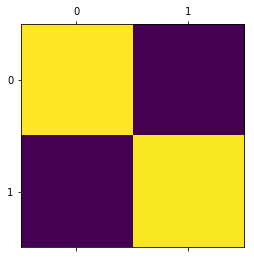

In [12]:
import sys
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    movie_reviews_data_folder = 'txt_sentoken'
    dataset = load_files(movie_reviews_data_folder, shuffle=False)
    print("n_samples: %d" % len(dataset.data))

    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

    parameters = {
        'vect__ngram_range': [(1, 1), (1, 2)],
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    n_candidates = len(grid_search.cv_results_['params'])
    for i in range(n_candidates):
        print(i, 'params - %s; mean - %0.2f; std - %0.2f'
              % (grid_search.cv_results_['params'][i],
                 grid_search.cv_results_['mean_test_score'][i],
                 grid_search.cv_results_['std_test_score'][i]))

    y_predicted = grid_search.predict(docs_test)

    print(metrics.classification_report(y_test, y_predicted, target_names=dataset.target_names))

    cm = metrics.confusion_matrix(y_test, y_predicted)
    print('Confusion Matrix:\n', cm)

    plt.matshow(cm)
    plt.show()

## Problem 2 (20 points): Explore the scikit-learn TfidVectorizer class

**Read the documentation for the TfidVectorizer class at http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html.** 
* Define the term frequency–inverse document frequency (TF-IDF) statistic (http://en.wikipedia.org/wiki/Tf%E2%80%93idf will likely help).
* Run the TfidVectorizer class on the training data above (docs_train).
* Explore the min_df and max_df parameters of TfidVectorizer.  What do they mean? How do they change the features you get?
* Explore the ngram_range parameter of TfidVectorizer.  What does it mean? How does it change the features you get? (Note, large values  of ngram_range may take a long time to run!)

---
- min_df : float in range [0.0, 1.0] or int, default=1
```
When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
```

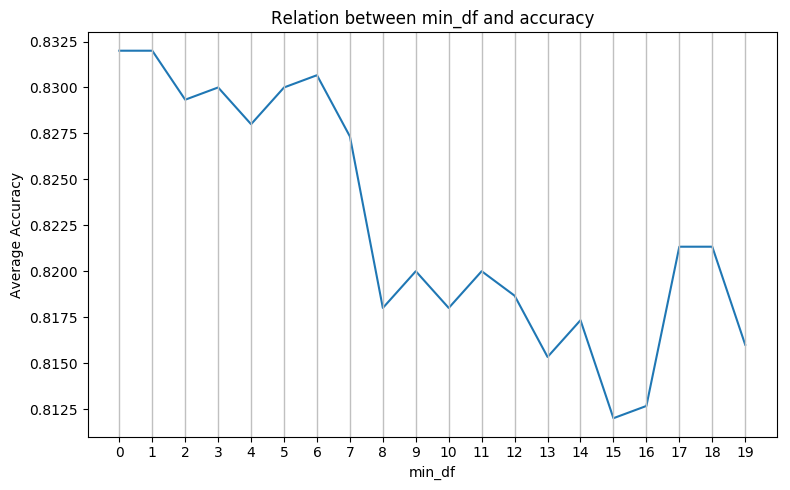

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

if __name__ == "__main__":
    movie_reviews_data_folder = 'txt_sentoken'
    dataset = load_files(movie_reviews_data_folder, shuffle=False)

    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    pipeline = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', LinearSVC(C=1000)),
    ])

    parameters = {
        ''
        'vect__min_df': [i for i in range(20)],
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)
    n_candidates = len(grid_search.cv_results_['params'])
           
    min_df = []
    mean = []   
    for i in range(n_candidates):
            min_df.append(grid_search.cv_results_['params'][i]['vect__min_df'])
            mean.append(grid_search.cv_results_['mean_test_score'][i])
        
    plt.figure(figsize=(8,5), dpi=100)
    plt.plot(min_df, mean)
    plt.xticks(min_df)
    for i in min_df:
        plt.axvline(x=i,linewidth=1, color='silver' )
    plt.xlabel("min_df")
    plt.ylabel("Average Accuracy")  
    plt.title("Relation between min_df and accuracy")
    plt.tight_layout()
    plt.show()

---
- max_df : float in range [0.0, 1.0] or int, default=1.0
```
When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.
```

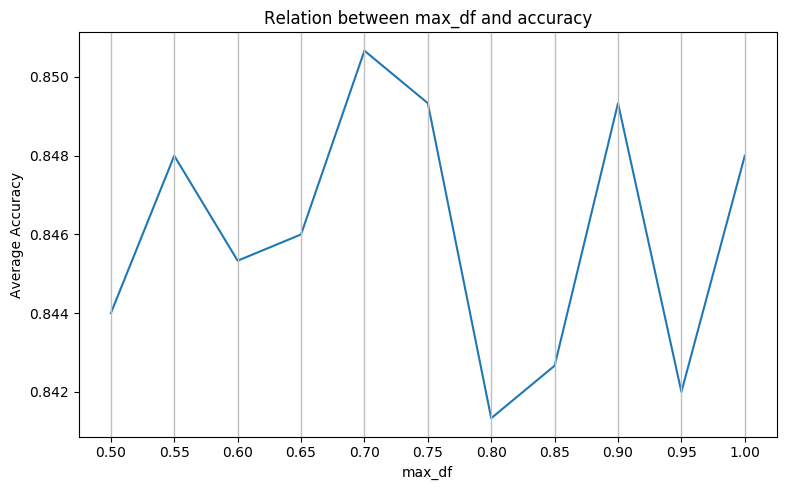

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy

if __name__ == "__main__":
    movie_reviews_data_folder = 'txt_sentoken'
    dataset = load_files(movie_reviews_data_folder, shuffle=False)

    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    pipeline = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', LinearSVC(C=1000)),
    ])

    parameters = {
        'vect__max_df': [i for i in numpy.arange(0.5, 1.05, 0.05)],
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)
    n_candidates = len(grid_search.cv_results_['params'])

    max_df = []
    mean = []
    for i in range(n_candidates):
        max_df.append(grid_search.cv_results_['params'][i]['vect__max_df'])
        mean.append(grid_search.cv_results_['mean_test_score'][i])

    plt.figure(figsize=(8, 5), dpi=100)
    plt.plot(max_df, mean)
    plt.xticks(max_df)
    for i in max_df:
        plt.axvline(x=i, linewidth=1, color='silver')
    plt.xlabel("max_df")
    plt.ylabel("Average Accuracy")
    plt.title("Relation between max_df and accuracy")
    plt.tight_layout()
    plt.show()

---
- ngram_range : tuple (min_n, max_n)
```
The lower and upper boundary of the range of n-values for different n-grams to be extracted. All values of n such that min_n <= n <= max_n will be used.
```

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
import operator

if __name__ == "__main__":
    movie_reviews_data_folder = 'txt_sentoken'
    dataset = load_files(movie_reviews_data_folder, shuffle=False)

    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    pipeline = Pipeline([
        ('vect', TfidfVectorizer()),
        ('clf', LinearSVC(C=1000)),
    ])

    parameters = {
        'vect__ngram_range': [(1,1),(2,2),(3,3),(4,4),(1,2),(2,3),(3,4),(1,3),(2,4),(1,4)]
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)
    n_candidates = len(grid_search.cv_results_['params'])

    result={}
    for i in range(n_candidates):
        result[grid_search.cv_results_['params'][i]['vect__ngram_range']] = grid_search.cv_results_['mean_test_score'][i]
    sorted_result = reversed(sorted(result.items(), key=operator.itemgetter(1)))
    
    for i in sorted_result:
        print('ngram_range: ',i[0],'\tAccurancy:',i[1])


ngram_range:  (1, 1) 	Accurancy: 0.843333333333
ngram_range:  (1, 2) 	Accurancy: 0.831333333333
ngram_range:  (2, 2) 	Accurancy: 0.821333333333
ngram_range:  (2, 3) 	Accurancy: 0.806666666667
ngram_range:  (1, 3) 	Accurancy: 0.798666666667
ngram_range:  (2, 4) 	Accurancy: 0.796
ngram_range:  (3, 3) 	Accurancy: 0.758666666667
ngram_range:  (3, 4) 	Accurancy: 0.747333333333
ngram_range:  (1, 4) 	Accurancy: 0.742
ngram_range:  (4, 4) 	Accurancy: 0.702666666667


---
### Integrate min_df, max_df and ngram_range

In [15]:
"""
Store the data into an HDF5 file
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
import pandas as pd

if __name__ == "__main__":
    movie_reviews_data_folder = 'txt_sentoken'
    dataset = load_files(movie_reviews_data_folder, shuffle=False)

    docs_train, docs_test, y_train, y_test = train_test_split(
        dataset.data, dataset.target, test_size=0.25, random_state=None)

    pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

    parameters = {
        'vect__min_df': [0, 1, 2, 3, 4, 5],
        'vect__max_df': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)]
    }
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1)
    grid_search.fit(docs_train, y_train)

    n_candidates = len(grid_search.cv_results_['params'])
    max_df = []
    min_df = []
    ngram_range = []
    mean = []
    std = []
    for i in range(n_candidates):
        max_df.append(grid_search.cv_results_['params'][i]['vect__max_df'])
        min_df.append(grid_search.cv_results_['params'][i]['vect__min_df'])
        ngram_range.append(str(grid_search.cv_results_['params'][i]['vect__ngram_range']))
        mean.append(grid_search.cv_results_['mean_test_score'][i])
        std.append(grid_search.cv_results_['std_test_score'][i])

    data = {'max_df': max_df, 'min_df': min_df, 'ngram_range': ngram_range, 'mean': mean, 'std': std}
    df = pd.DataFrame(data=data)
    df = df[['max_df', 'min_df', 'ngram_range', 'mean', 'std']]
    df = df.sort_values(by=['mean', 'std'], ascending=[0, 1])
    hdf5 = pd.HDFStore('data.h5')
    hdf5['data'] = df
    hdf5.close()

In [16]:
import pandas as pd
data = pd.read_hdf('data.h5')
print(data)

     max_df  min_df ngram_range      mean       std
137     1.0       4      (1, 2)  0.860000  0.004371
33      0.6       2      (1, 2)  0.860000  0.004536
65      0.7       4      (1, 2)  0.859333  0.005214
133     1.0       3      (1, 2)  0.858667  0.002650
57      0.7       2      (1, 2)  0.857333  0.001151
39      0.6       3      (1, 4)  0.857333  0.008545
41      0.6       4      (1, 2)  0.856667  0.000972
138     1.0       4      (1, 3)  0.856667  0.002724
37      0.6       3      (1, 2)  0.856667  0.004210
66      0.7       4      (1, 3)  0.856667  0.004342
81      0.8       2      (1, 2)  0.856667  0.004921
13      0.5       3      (1, 2)  0.856667  0.009613
61      0.7       3      (1, 2)  0.856000  0.004545
63      0.7       3      (1, 4)  0.856000  0.010151
67      0.7       4      (1, 4)  0.855333  0.006832
62      0.7       3      (1, 3)  0.855333  0.008612
17      0.5       4      (1, 2)  0.855333  0.010540
129     1.0       2      (1, 2)  0.854667  0.004923
38      0.6 

*------------------------

## Problem 3 (20 points): Machine learning algorithms


* Based upon Problem 2 pick some parameters for TfidfVectorizer
    * "fit" your TfidfVectorizer using docs_train
    * Compute "Xtrain", a Tf-idf-weighted document-term matrix using the transform function on docs_train
    * Compute "Xtest", a Tf-idf-weighted document-term matrix using the transform function on docs_test
    * Note, be sure to use the same Tf-idf-weighted class (**"fit" using docs_train**) to transform **both** docs_test and docs_train
* Examine two classifiers provided by scikit-learn 
    * LinearSVC
    * KNeighborsClassifier
    * Try a number of different parameter settings for each and judge your performance using a confusion matrix (see Problem 1 for an example).
* Does one classifier, or one set of parameters work better?
    * Why do you think it might be working better?
* For a particular choice of parameters and classifier, look at 2 examples where the prediction was incorrect.
    * Can you conjecture on why the classifier made a mistake for this prediction?

*------------------------

## Problem 4 (20 points): Open Ended Question:  Finding the right plot

* Can you find a two dimensional plot in which the positive and negative reviews are separated?
    * This problem is hard since you will likely have thousands of features for review, and you will need to transform these thousands of features into just two numbers (so that you can make a 2D plot).
* Note, I was not able to find such a plot myself!
    * So, this problem is about **trying** but perhaps **not necessarily succeeding**!
* I tried two things, neither of which worked very well.
    * I first plotted the length of the review versus the number of features we compute that are in that review
    * Second I used Principle Component Analysis on a subset of the features.
* Can you do better than I did!?

# Report: communicate the results (20 points)

(1) (5 points) What data you collected?

(2) (5 points) Why this topic is interesting or important to you? (Motivations)

(3) (5 points) How did you analyse the data?

(4) (5 points) What did you find in the data?
(please include figures or tables in the report, but no source code)

# Slides (for 10 minutes of presentation) (20 points)


1. (5 points) Motivation about the data collection, why the topic is interesting to you. 

2. (10 points) Communicating Results (figure/table)

3. (5 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)

*-----------------
# Done

All set! 

** What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "filename.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook. If you used "ipython notebook --pylab=inline" to open the notebook, all the figures and tables should have shown up in the notebook.


* **PPT Slides**: please prepare PPT slides (for 10 minutes' talk) to present about the case study . We will ask two teams which are randomly selected to present their case studies in class for this case study. 

* ** Report**: please prepare a report (less than 10 pages) to report what you found in the data.
    * What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer?  Why?

   (please include figures or tables in the report, **but no source code**)

*Please compress all the files into a single zipped file.*


** How to submit: **

        Please submit through email to Prof. Paffenroth (rcpaffenroth@wpi.edu) *and* the TA Yingnan Liu (yliu18@wpi.edu).

#### We auto-process the submissions so make sure your subject line is *exactly*:

### DS501 Case Study 3 Team ??

#### where ?? is your team number.
        
** Note: Each team just needs to submits one submission **